In [63]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("BCData.csv", header = None)

In [64]:
data_orig = data.copy()
X = data.iloc[:,2:]
y = data.iloc[:,1]

In [65]:
XM = X[y == "M"]
XB = X[y == "B"]

In [66]:
nFea = X.shape[1]
averageM = [0 for i in range(nFea)]
rangesM = [0 for i in range(nFea)]

for j in range(nFea):
    averageM[j] = XM.iloc[:,j].mean()
    rangesM[j] = XM.iloc[:,j].max() - XM.iloc[:,j].min() 
    #rangesM[j] = XM.iloc[:,j].std()
    XM.iloc[:,j] -= averageM[j]
    XM.iloc[:,j] = XM.iloc[:,j]/rangesM[j] 
   
averageB = [0 for i in range(nFea)]
rangesB = [0 for i in range(nFea)]

for j in range(XB.shape[1]):
    averageB[j] = XB.iloc[:,j].mean()
    rangesB[j] = XB.iloc[:,j].max() - XB.iloc[:,j].min() 
    #rangesB[j] = XB.iloc[:,j].std()
    XB.iloc[:,j] -= averageB[j]
    XB.iloc[:,j] = XB.iloc[:,j]/rangesB[j] 
    
'''
for j in range(nFea):
    averageM[j] = X.iloc[:,j].mean()
    rangesM[j] = X.iloc[:,j].max() - X.iloc[:,j].min() 
     #rangesM[j] = X.iloc[:,j].std()
    averageB[j] = averageM[j]
    rangesB[j] = rangesM[j]
    XM.iloc[:,j] -= averageM[j]
    XM.iloc[:,j] = XM.iloc[:,j]/rangesM[j] 
    XB.iloc[:,j] -= averageB[j]
    XB.iloc[:,j] = XB.iloc[:,j]/rangesB[j] 
'''    

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [79]:
Krange = [k for k in range(2,30)]

thetaM = [0 for i in range(len(Krange))]
thetaB = [0 for i in range(len(Krange))]

# random_state 4 and 1 is standard
for K in Krange:
    kmM = KMeans(n_clusters = K,  random_state = 4)
    kmM.fit(XM)
    centroidM = kmM.cluster_centers_
    labelsM = kmM.labels_
    davgM = 0;
    for k in range(K):
        for i in range(XM.shape[0]):
            if(labelsM[i] == k):
                diff = XM.iloc[i, :] - centroidM[k, :]
                davgM = davgM + (np.dot(diff, diff))**0.5
    davgM = davgM/XM.shape[0]
    dminM = 100000000;
    for k in range(K-1):
        for kk in range(k+1, K):
            dist = centroidM[k,:] - centroidM[kk,:]
            dist = (np.dot(dist, dist))**0.5
            if(dist < dminM):
                dminM = dist
    thetaM[K-Krange[0]] = davgM/dminM

for K in Krange:
    kmB = KMeans(n_clusters = K,  random_state = 1)
    kmB.fit(XB)
    centroidB = kmB.cluster_centers_
    labelsB = kmB.labels_
    davgB = 0;
    for k in range(K):
        for i in range(XB.shape[0]):
            if(labelsB[i] == k):
                diff = XB.iloc[i, :] - centroidB[k, :]
                davgB = davgB + (np.dot(diff, diff))**0.5
    davgB = davgB/XB.shape[0]
    dminB = 100000000;
    for k in range(K-1):
        for kk in range(k+1, K):
            dist = centroidB[k,:] - centroidB[kk,:]
            dist = (np.dot(dist, dist))**0.5
            if(dist < dminB):
                dminB = dist
    thetaB[K-Krange[0]] = davgB/dminB
    

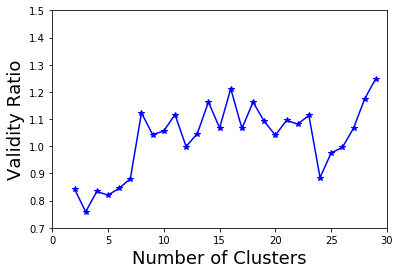

In [80]:
plt.plot(Krange, thetaM, '-*b')
plt.xlabel("Number of Clusters", fontsize=18)
plt.ylabel("Validity Ratio", fontsize=18)
plt.axis([0, 30, 0.7, 1.5])
#plt.title("Malignant: Validity ratio vs # of clusters [new result]", fontsize=18)
plt.savefig('Malignant_VR_K_New.png', format='png')
plt.savefig('Malignant_VR_K_New.eps', format='eps')

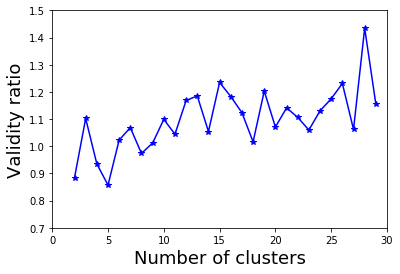

In [81]:
plt.plot(Krange, thetaB, '-*b')
plt.xlabel("Number of clusters", fontsize=18)
plt.ylabel("Validity ratio", fontsize=18)
plt.axis([0, 30, 0.7, 1.5])
#plt.title("Benign: Validity ratio vs # of clusters [new result]")
plt.savefig('Benign_VR_K_New.png', format='png')
plt.savefig('Benign_VR_K_New.eps', format='eps')